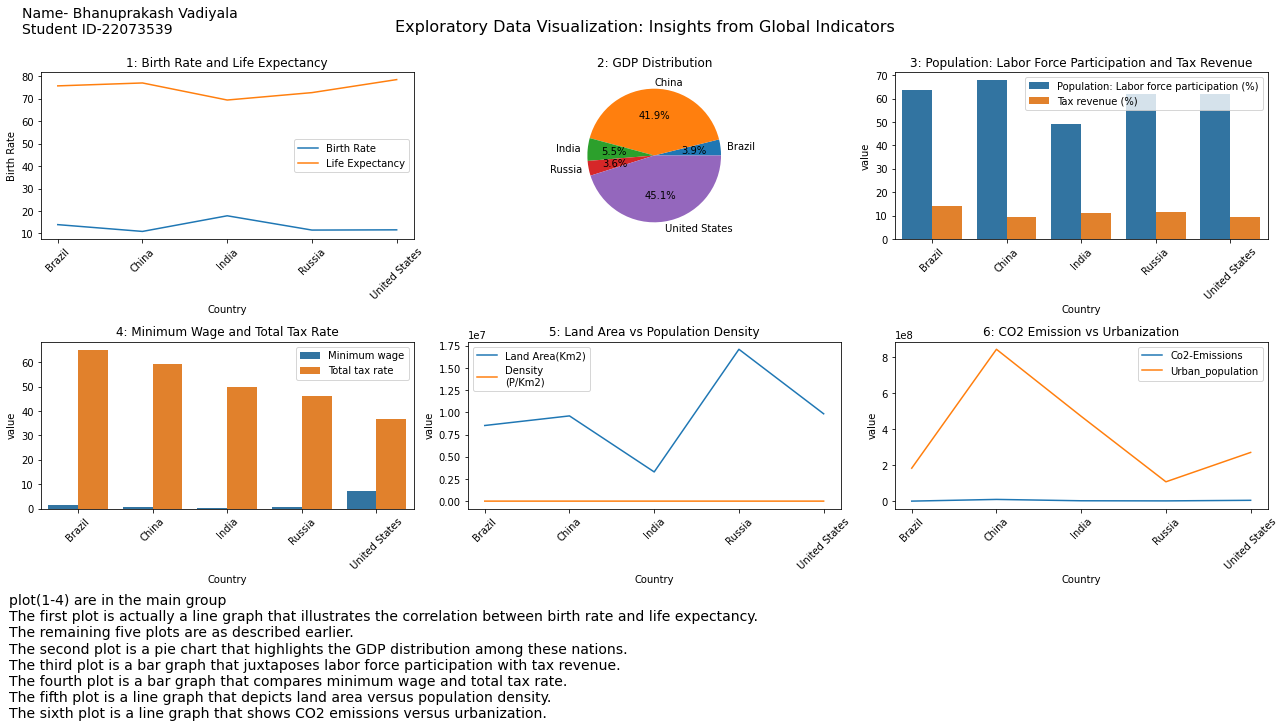

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset
data = pd.read_csv('world-data-2023.csv')

data.drop(columns=['Abbreviation', 'Armed Forces size', 'Calling Code', 'Capital/Major City', 'Currency-Code', 'Gasoline Price', 'Largest city', 'Official language', 'Latitude', 'Longitude'], inplace=True)

data = data.dropna()

# Selecting some countries
selected_countries = ['China', 'India', 'United States', 'Brazil', 'Russia']

df = data.copy()

# Convert columns with commas and percentages to numeric
numeric_cols = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Minimum wage',  'Forested Area (%)', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Out of pocket health expenditure', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']
for col in numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col].replace('[\$,]', '', regex=True).str.rstrip('%'), errors='coerce')
    except:
        pass

# Melt DataFrame for plots 5 and 6
melted_df = pd.melt(df[df['Country'].isin(selected_countries)], id_vars=['Country'], value_vars=['Land Area(Km2)', 'Density\n(P/Km2)', 'Co2-Emissions', 'Urban_population'])

# Set up the subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Exploratory Data Visualization: Insights from Global Indicators', fontsize=16)

plt.figtext(0.02, 0.96, 'Name- Bhanuprakash Vadiyala\nStudent ID-22073539', ha="left", fontsize=14)

# Plot 1: Birth Rate and Life Expectancy
sns.lineplot(ax=axes[0, 0], data=df[df['Country'].isin(selected_countries)], x='Country', y='Birth Rate', label='Birth Rate')
sns.lineplot(ax=axes[0, 0], data=df[df['Country'].isin(selected_countries)], x='Country', y='Life expectancy', label='Life Expectancy')
axes[0, 0].set_title('1: Birth Rate and Life Expectancy')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Pie chart with GDP
gdp_data = df[df['Country'].isin(selected_countries)].groupby('Country')['GDP'].sum()
axes[0, 1].pie(gdp_data, labels=gdp_data.index, autopct='%1.1f%%')
axes[0, 1].set_title('2: GDP Distribution')

# Plot 3: Bar chart for Population: Labor force participation (%) and Total revenue (%)
melted_df_pop = pd.melt(df[df['Country'].isin(selected_countries)], id_vars=['Country'], value_vars=['Population: Labor force participation (%)', 'Tax revenue (%)'])
sns.barplot(ax=axes[0, 2], data=melted_df_pop, x='Country', y='value', hue='variable')
axes[0, 2].set_title('3: Population: Labor Force Participation and Tax Revenue')
axes[0, 2].legend()
axes[0, 2].tick_params(axis='x', rotation=45)

# Plot 4: Bar chart for Minimum Wage and Total Tax Rate
melted_df_wage = pd.melt(df[df['Country'].isin(selected_countries)], id_vars=['Country'], value_vars=['Minimum wage', 'Total tax rate'])
sns.barplot(ax=axes[1, 0], data=melted_df_wage, x='Country', y='value', hue='variable')
axes[1, 0].set_title('4: Minimum Wage and Total Tax Rate')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 5: Line chart for Land Area and Population Density
sns.lineplot(ax=axes[1, 1], data=melted_df[melted_df['variable'].isin(['Land Area(Km2)', 'Density\n(P/Km2)'])], x='Country', y='value', hue='variable')
axes[1, 1].set_title('5: Land Area vs Population Density')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot 6: Line chart for CO2 Emission and Urbanization
sns.lineplot(ax=axes[1, 2], data=melted_df[melted_df['variable'].isin(['Co2-Emissions', 'Urban_population'])], x='Country', y='value', hue='variable')
axes[1, 2].set_title('6: CO2 Emission vs Urbanization')
axes[1, 2].legend()
axes[1, 2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0.18, 1, 0.98])

# # Show the plots
# plt.show()

plot_descriptions = {
"""
plot(1-4) are in the main group
The first plot is actually a line graph that illustrates the correlation between birth rate and life expectancy. 
The remaining five plots are as described earlier.
The second plot is a pie chart that highlights the GDP distribution among these nations. 
The third plot is a bar graph that juxtaposes labor force participation with tax revenue. 
The fourth plot is a bar graph that compares minimum wage and total tax rate. 
The fifth plot is a line graph that depicts land area versus population density. 
The sixth plot is a line graph that shows CO2 emissions versus urbanization."""
}

plt.figtext(0.01, 0.01, '\n'.join(plot_descriptions), ha='left', fontsize=14)
plt.show()